In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import analysis

In [3]:
freq_start = -0.24
freq_stop = -0.27
freq_steps = 31
freq = np.linspace(freq_start, freq_stop, freq_steps)

IQ_angle_q1 = 240
IQ_angle_q2 = 220
num_steps = 51
reps = 100
qubit_1_thr = [-5000, 5000]
qubit_2_thr = [-5000, 5000]
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
ROIF1 = q1_dict["ro_freq"] - readout_dict["RO_LO"]
ROIF2 = q2_dict["ro_freq"] - readout_dict["RO_LO"]
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
q1 = Qubit(q1_dict)
q2 = Qubit(q2_dict)
readout = Readout(readout_dict)

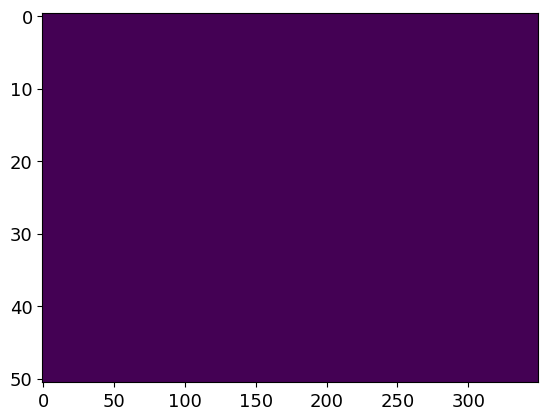

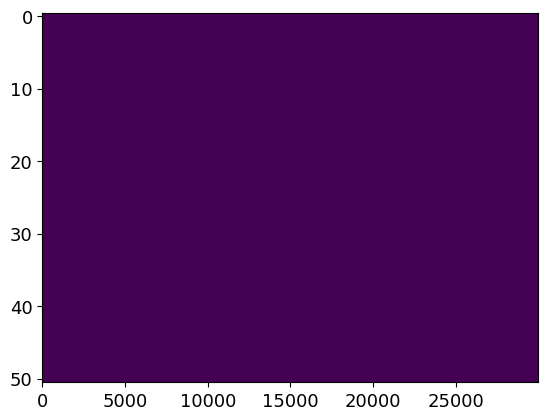

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 51
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 51
Records per pattern: 100
Buffers per acquistion: 2
DAQ samples per pattern: 8192
0, No error
Capturing 2 buffers. Press <enter> to abort
Capture completed in 1.419286 sec
Captured 2 buffers (1.409159 buffers per sec)
Captured 6144 records (4328.937188 records per sec)
Transferred 100663296 bytes (70925306.881649 bytes per sec)


<Figure size 800x800 with 0 Axes>

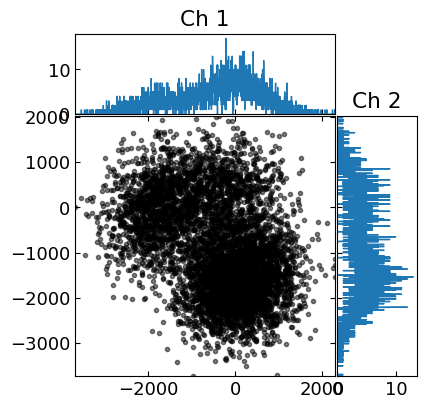

<Figure size 800x800 with 0 Axes>

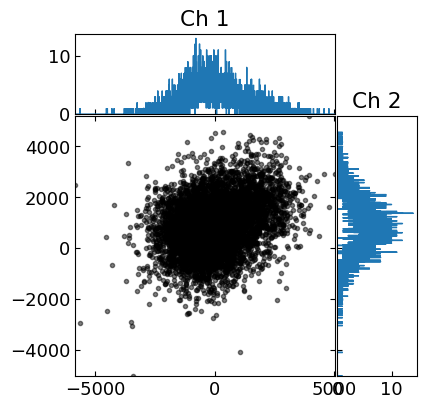

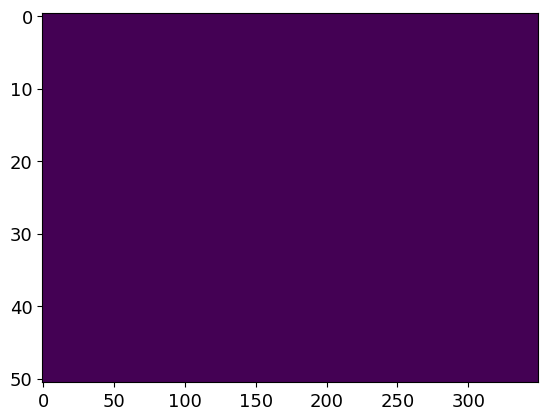

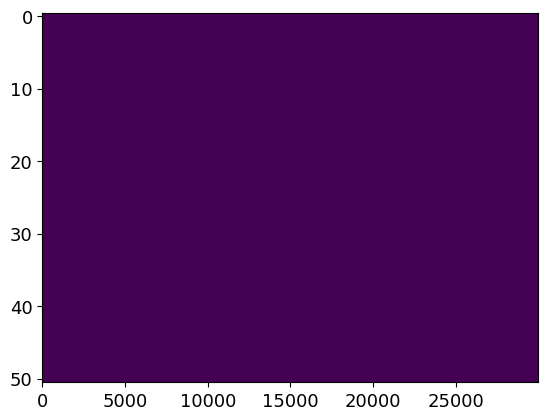

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 51
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 51
Records per pattern: 100
Buffers per acquistion: 2
DAQ samples per pattern: 8192
0, No error
Capturing 2 buffers. Press <enter> to abort
Capture completed in 1.345388 sec
Captured 2 buffers (1.486560 buffers per sec)
Captured 6144 records (4566.711763 records per sec)
Transferred 100663296 bytes (74821005.521738 bytes per sec)


<Figure size 800x800 with 0 Axes>

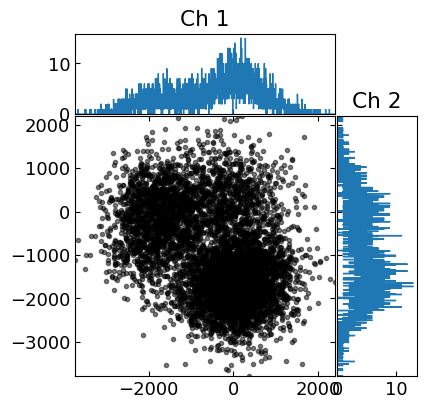

<Figure size 800x800 with 0 Axes>

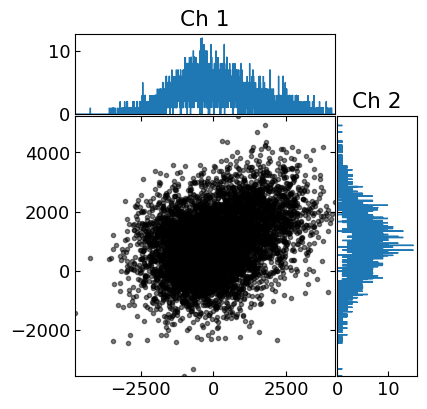

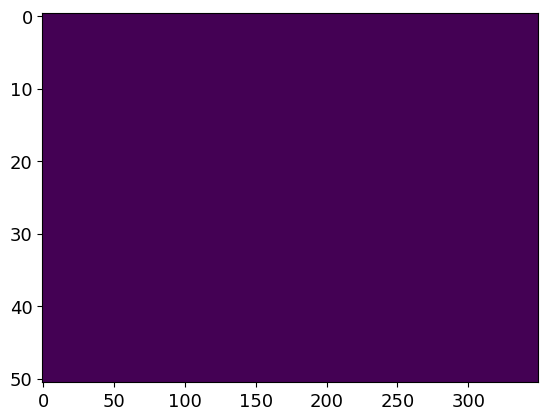

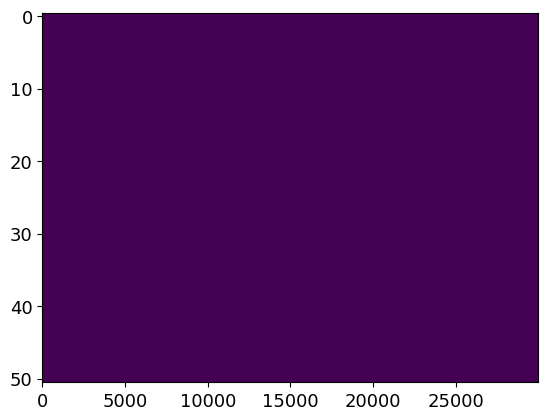

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 51
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 51
Records per pattern: 100
Buffers per acquistion: 2
DAQ samples per pattern: 8192


Exception: Error calling function AlazarSetCaptureClock with arguments (4420, 1, 53, 0, 0) : b'ApiWaitTimeout'

In [5]:
I_1, Q_1, I_2, Q_2 = np.zeros((4, freq_steps, num_steps))
for i in range(len(freq)):
    f = freq[i]
    rabi.rabi_ef(q1, q2, readout, general_vals_dict)
    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    # acquire the data...
    (
        n_vs_pats_1,
        n_vs_pats_2,
        rec_avg_all,
        rec_all,
        rec_readout_1,
        rec_readout_2,
        rec_avg_vs_pats_1,
        rec_avg_vs_pats_2,
        rec_all_het_1,
        rec_all_het_2,
        bins_1,
        bins_2,
        counts_1,
        counts_2,
        prob_vs_pats_1,
        prob_vs_pats_2,
        n_readout_1,
        n_readout_2,
        rec_readout_vs_pats_1,
        rec_readout_vs_pats_2,
    ) = daq.run_daq_het_2q(
        ROIF1,
        ROIF2,
        deg_1=IQ_angle_q1,
        deg_2=IQ_angle_q2,
        num_patterns=num_steps,
        num_records_per_pattern=reps,
        ro_dur=readout.ro_dur,
        qubit_1_thr=qubit_1_thr,
        qubit_2_thr=qubit_2_thr,
        verbose=True,
    )

In [ ]:
P_Q1 = prob_vs_pats_1[0]
I_Q1 = rec_avg_vs_pats_1[0]
Q_Q1 = rec_avg_vs_pats_1[1]
plt.plot(I_Q1)
plt.title("I Q1")
plt.show()
plt.plot(Q_Q1)
plt.title("Q Q1")
plt.show()
print("Qubit 2")
P_Q2 = prob_vs_pats_2[0]
I_Q2 = rec_avg_vs_pats_2[0]
Q_Q2 = rec_avg_vs_pats_2[1]
plt.plot(I_Q2)
plt.title("I Q2")
plt.show()
plt.plot(Q_Q2)
plt.title("Q Q2")
plt.show()

I_1[i] = I_Q1
Q_1[i] = Q_Q1
I_2[i] = I_Q2
Q_2[i] = Q_Q2
plt.imshow(I_1, extent=[0, sweep_time / 1000, freq_stop, freq_start], aspect="auto")
plt.colorbar(label="I_1")
plt.ylabel("Frequency (GHz)")
plt.xlabel("time (microseconds)")
plt.show()
plt.imshow(Q_1, extent=[0, sweep_time / 1000, freq_stop, freq_start], aspect="auto")
plt.colorbar(label="Q_1")
plt.ylabel("Frequency (GHz)")
plt.xlabel("time (microseconds)")
plt.show()
plt.imshow(I_2, extent=[0, sweep_time / 1000, freq_stop, freq_start], aspect="auto")
plt.colorbar(label="I_2")
plt.ylabel("Frequency (GHz)")
plt.xlabel("time (microseconds)")
plt.show()
plt.imshow(Q_2, extent=[0, sweep_time / 1000, freq_stop, freq_start], aspect="auto")
plt.colorbar(label="Q_2")
plt.ylabel("Frequency (GHz)")
plt.xlabel("time (microseconds)")
plt.show()
save_basename = "\\pi_ef"
np.savetxt(save_dir + save_basename + "_cheveron_pief_I1240,370.txt", I_1)
np.savetxt(save_dir + save_basename + "_cheveron_pief_Q1240,370.txt", Q_1)